# Introduction
Clustering is a branch of unsupervised learning that groups data points based on an algorithm specific similarity metric.

This example uses a dataset about penguins available from here: https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins.csv which was gathered from a scientific study at Palmer Station, Antartica by Dr. Kristen Gorman. More details can be learned about here: https://github.com/allisonhorst/palmerpenguins/tree/main

# Load the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
df = pd.read_csv('data/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
print(df.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


# Visualize the data

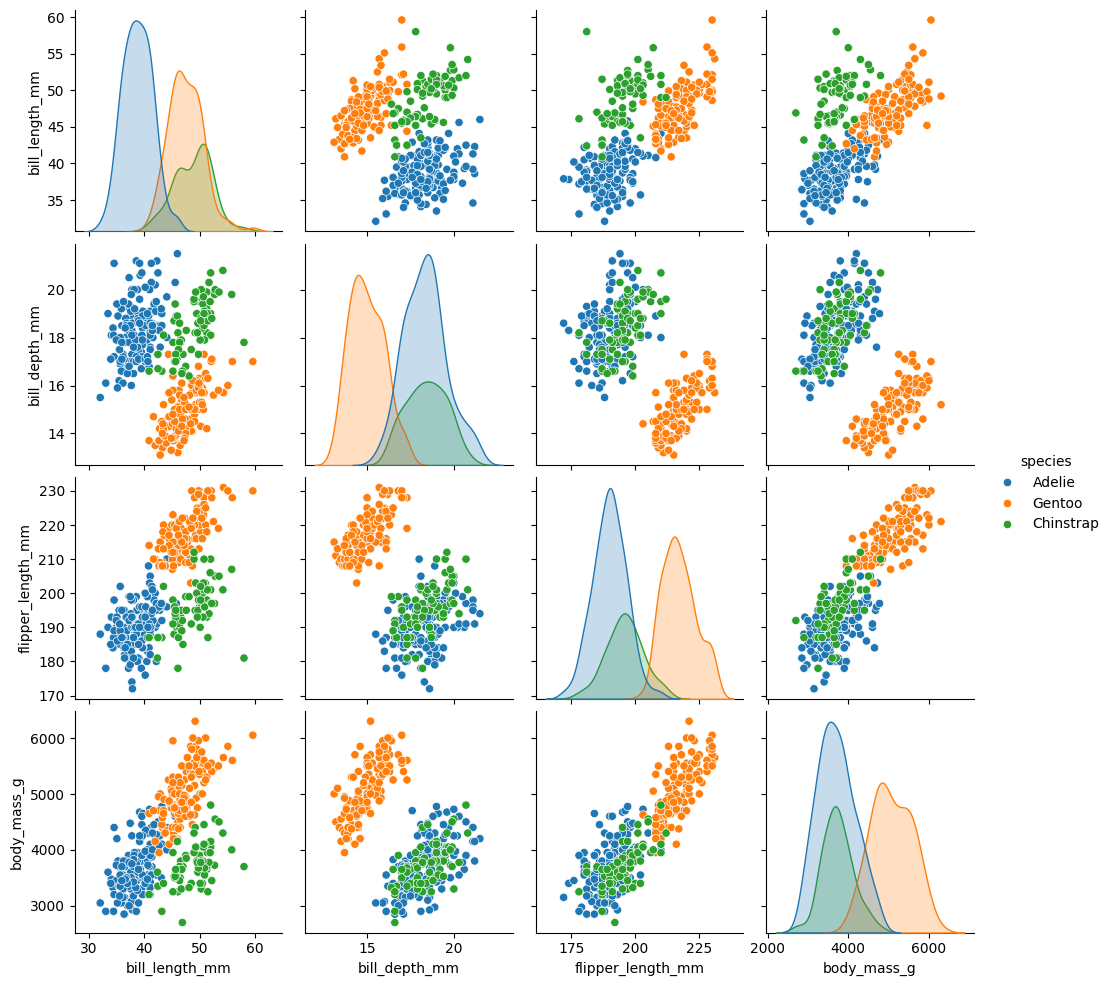

In [3]:
sns.pairplot(df, hue="species", vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'])

# True grouping

We'll focus on bill length vs. bill depth plot.

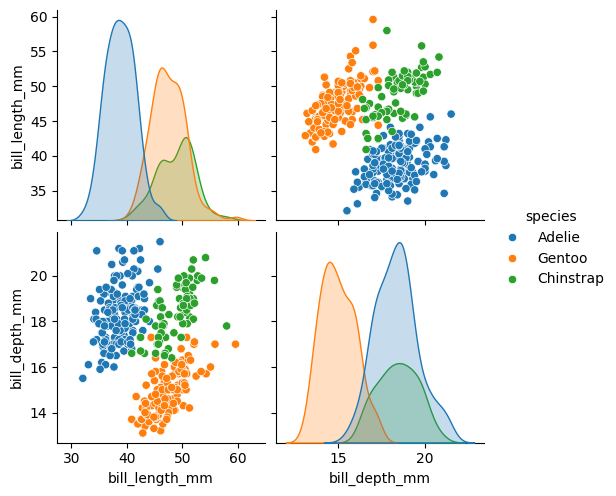

In [4]:
sns.pairplot(df, hue="species", vars=['bill_length_mm', 'bill_depth_mm'])

# DBSCAN clustering

DBSCAN considers the density of points when forming groups. The general algorithm of DBSCAN includes:
 1. Core points are identified using a user defined radius and minimum neighbor count. 
 2. Core points are formed into groups
 3. Non-core points near groups are added. Non-core points near more than one group are only added on group, the group they are checked against first
 4. Outliers are NOT included in any cluster for the DBSCAN algorithm. 

The strength of DBSCAN approach includes
 - The number of clusters does't need to be provided up front
 - The clusters can be an arbitrary shape
 - Not impacted by outliers

In [5]:
import numpy as np
from sklearn.cluster import DBSCAN

X = df[["bill_length_mm", "bill_depth_mm"]].dropna()
clustering = DBSCAN(eps = 1.1, min_samples = 8).fit(X)
labels = clustering.labels_

noise_count = list(labels).count(-1)
cluster_count = len(set(labels)) - (1 if noise_count > 0 else 0)

print(f"Estimated number of clusters: {cluster_count}")
print(f"Estimated number of noise points: {noise_count}")

Estimated number of clusters: 3
Estimated number of noise points: 23


# Cluster grouping

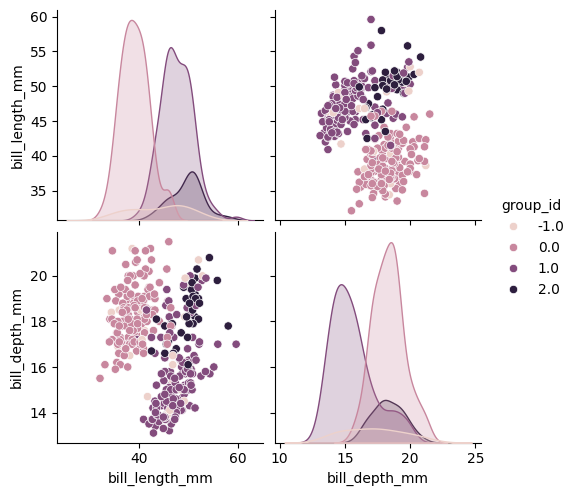

In [6]:
labels_df = pd.DataFrame(labels, columns=["group_id"])
result_df = X.join(labels_df)
sns.pairplot(result_df, hue="group_id")

# Showing the strength of DBSCAN

The previous penguin example could have also been solved with other approaches such as k-means. We can see the strength of DBSCAN with synthetic data that doesn't fit well in a regular circle.

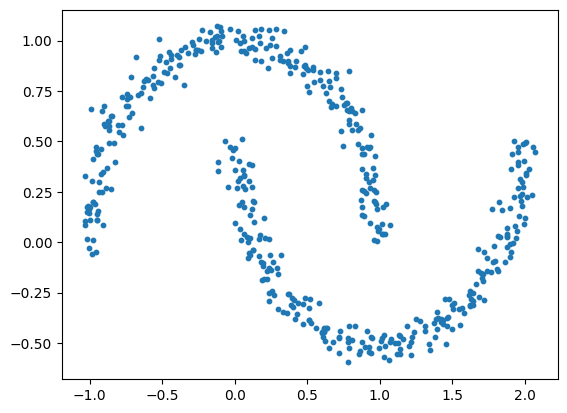

In [7]:
from sklearn import datasets

n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
X, y = noisy_moons

plt.scatter(X[:, 0], X[:, 1], s=10)

In [8]:
moon_clustering = DBSCAN(eps = 0.25, min_samples = 6).fit(X)
moon_labels = moon_clustering.labels_

moon_noise_count = list(moon_labels).count(-1)
moon_cluster_count = len(set(moon_labels)) - (1 if moon_noise_count > 0 else 0)

print(f"Estimated number of clusters: {moon_cluster_count}")
print(f"Estimated number of noise points: {moon_noise_count}")

Estimated number of clusters: 2
Estimated number of noise points: 0


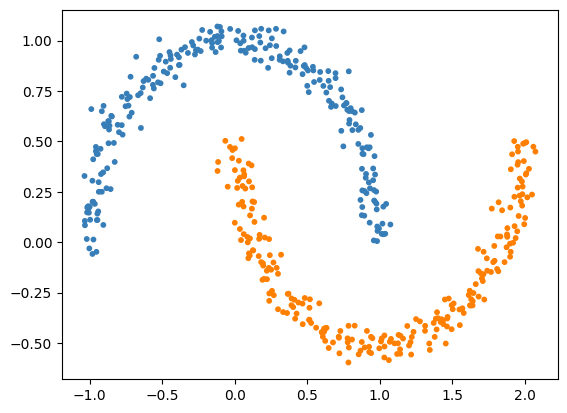

In [9]:
y_pred = moon_labels.astype(int)
colors = np.array(list(["#377eb8","#ff7f00"]))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])